In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
import copy
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
# Define the model of the system

def next_state_and_reward(s,a):
    r = 0
    if s == 2:
        sp = 22
        r = 10
    elif s ==4:
        sp = 14
        r = 5
    elif a == 0:     # Action = UP
        if s<=5:     # State in top row
            sp = s
            r = -1
        else:
            sp = s - 5
    elif a == 1:     # Action = RIGHT
        if s%5==0:   # State in rightmost column
            sp = s
            r = -1
        else:
            sp = s + 1
    elif a == 2:     # Action = DOWN
        if s>=21:     # State in bottom row
            sp = s
            r = -1
        else:
            sp = s + 5
    elif a == 3:     # Action = LEFT
        if s%5==1:   # State in leftmost column
            sp = s
            r = -1
        else:
            sp = s - 1
    
    return (sp,r)

In [3]:
# Helper Functions
def alphaT(t):
    return 1/math.ceil((t+1)/100)
    
def betaT(t,c):
    return c*alphaT(t)

In [4]:
def runExperiment(s0,T,c):
    # Initialize Algorithm Parameters
    w =  np.zeros(25)
    avgR = 0

    s = s0      #Set initial state

    # Performance Metrics 
    wArray = []
    avgRarray = []

    #Algorithm

    for t in range(T):
        a = np.random.randint(4)       # Select random action
        sp,R = next_state_and_reward(s,a)

        avgR += betaT(t,c)*(R-avgR)      # Update the average reward

        dt = R - avgR + w[sp-1] - w[s-1]   # Computing the TD error

        w[s-1] += alphaT(t) * dt

        s = sp                         # Set next state as current state
        
        wp = copy.copy(w)
        wArray.append(wp)
        avgRarray.append(avgR)    
    
    return (wArray,avgRarray)
    

[-0.9  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
[[ 5.39639434  8.16702185  4.85600277  5.33109609  2.23218346]
 [ 3.05287817  3.61265629  2.60548934  2.17217062  0.76234072]
 [ 0.54079574  0.98296012  0.9175583   0.43511052 -0.45962136]
 [-1.35096752 -0.78782248 -0.79115586 -1.12814276 -1.42649373]
 [-2.69607229 -2.07381918 -1.88928627 -2.2221606  -2.4911943 ]]


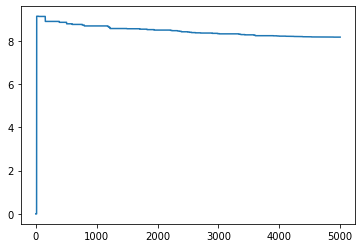

In [5]:
# Experiment Parameters
s0 = 1     # Starting State
T = 5000   # Time steps for running the experiment

# Algorithm HyperParameters
c = 0.1 

wArray,avgRarray = runExperiment(s0,T,c)

print(wArray[0])
print(wArray[-1].reshape(5,5))


plt.plot(range(T),[item[1] for item in wArray],label="s0=1,c=0.1")



In [25]:
with PdfPages(r'TrajectoryPlots.pdf') as export_pdf:
    T=5000
    
    for s0 in [1,13,25]:
        for c in [0.1,1,10]:
            
            wArray,avgRarray = runExperiment(s0,T,c)

            fig = plt.figure()
            
            fig.subplots_adjust(left=0.15, wspace=0.05)
            plt.subplot2grid((7, 3), (0, 0), colspan=3)

            txt = "Starting Position: "+str(s0)+" Algorithm Parameter c: "+str(c)            
            plt.text(0.05,0.95,txt, transform=fig.transFigure, size=16)
            plt.axis('off')
            
            
            plt.subplot2grid((7, 3), (1, 0), rowspan=2)
            plt.plot(range(T),avgRarray)
            plt.title('Avg Reward over 5K time steps')
            plt.xlabel('Time Steps')
            plt.ylabel('Avg Reward')
            
            position = {1:(1, 2), 13:(5, 0), 25:(5, 2)}
            for j in [1,13,25]:
                plt.subplot2grid((7, 3), position[j] , rowspan=2)
                plt.plot(range(T),[item[j-1] for item in wArray])
                plt.title('Weight '+str(j)+' over 5K time steps')
                plt.xlabel('Time Steps')
                plt.ylabel('Weight: '+str(j))
        
            export_pdf.savefig()
        
            plt.close()
